# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
import requests
import time
import random
from citipy import citipy

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
weather_api_key = "be30130d8cd8c0d1146e214d31e7ff18"

# Create empty lists for latitude, longitude, and city information
latitude = []
longitude = []
cities = []

# Generate 1500 random geographic coordinates (latitude and longitude)
for _ in range(1500):
    lat = random.uniform(-90.0, 90.0)
    lon = random.uniform(-180.0, 180.0)
    latitude.append(lat)
    longitude.append(lon)

    # Use citipy to find the nearest city for each latitude/longitude combination
    city = citipy.nearest_city(lat, lon).city_name

    # Add city if it's not already in the list (to avoid duplicates)
    if city not in cities:
        cities.append(city)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in your list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found: {city}. Skipping...")

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tutoia
Processing Record 2 of Set 1 | daru
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | taiohae
City not found: taiohae. Skipping...
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | manokwari
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | iskateley
Processing Record 11 of Set 1 | vung tau
Processing Record 12 of Set 1 | hanceville
Processing Record 13 of Set 1 | sona
Processing Record 14 of Set 1 | yashkul'
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ijuw
City not found: ijuw. Skipping...
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | shakhty
Processing Record 21 of Set 1 | timaru
Processi

In [9]:
import pandas as pd
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64


In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tutoia,-2.7619,-42.2744,26.01,83,40,4.85,BR,1729043911
1,daru,-9.0763,143.2092,27.91,74,26,4.87,PG,1729043912
2,bethel,41.3712,-73.4140,7.01,76,6,0.89,US,1729043743
3,blackmans bay,-43.0167,147.3167,20.41,44,75,1.79,AU,1729043916
4,bredasdorp,-34.5322,20.0403,12.04,87,0,5.01,ZA,1729043917


In [15]:
# Export the City_Data into a csv
import os

#'output_data' directory 
if not os.path.exists("output_data"):
    os.makedirs("output_data")

city_data_df.to_csv("output_data/cities_weather_data.csv", index=False)

In [17]:
# Read saved data
import pandas as pd 

city_data_df = pd.read_csv("/Users/latifahjones/Desktop/Python-api-challenge/WeatherPy/output_data/cities_weather_data.csv")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tutoia,-2.7619,-42.2744,26.01,83,40,4.85,BR,1729043911
1,daru,-9.0763,143.2092,27.91,74,26,4.87,PG,1729043912
2,bethel,41.3712,-73.4140,7.01,76,6,0.89,US,1729043743
3,blackmans bay,-43.0167,147.3167,20.41,44,75,1.79,AU,1729043916
4,bredasdorp,-34.5322,20.0403,12.04,87,0,5.01,ZA,1729043917


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

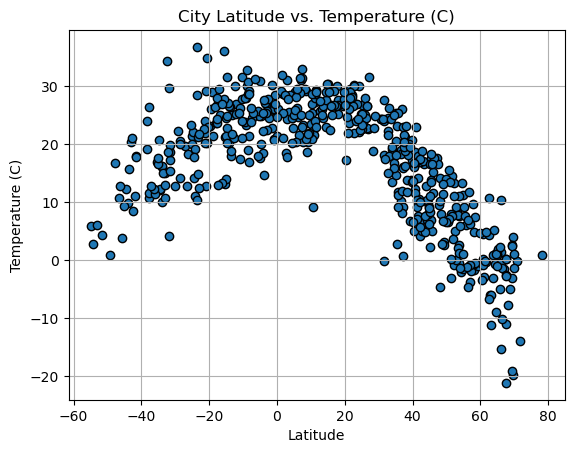

In [19]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', linewidth=1, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

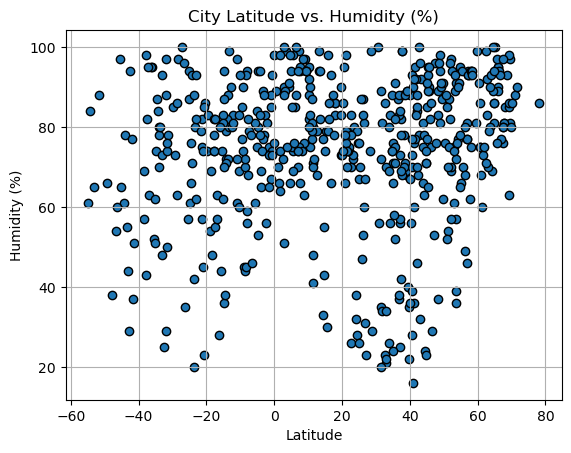

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', linewidths=1, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

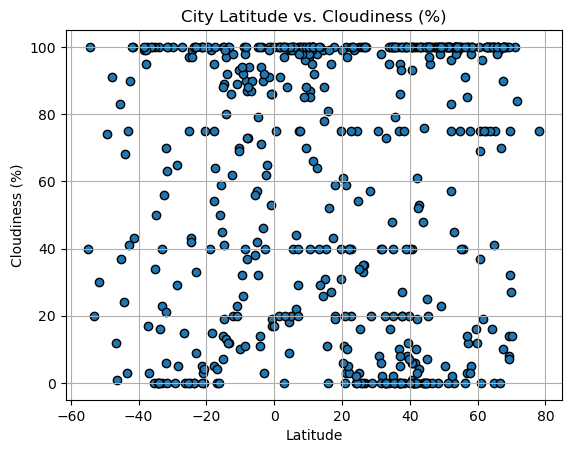

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', linewidths=1, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

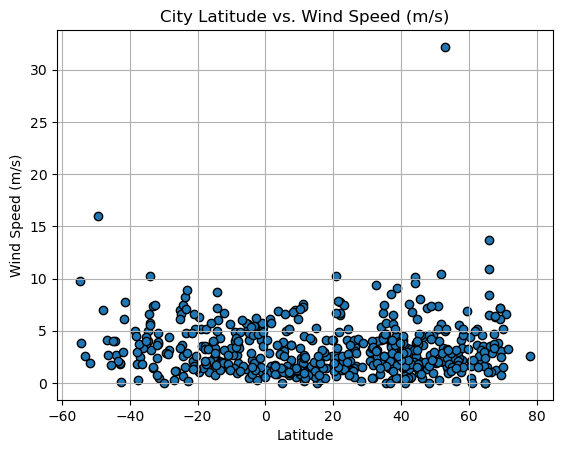

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', linewidths=1, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [36]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, hemisphere, title, xlabel, ylabel):
    """
    Creates scatter plot with a linear regression line for given x and y values.

    Parameters:
    - x_values: The independent variable (e.g., Latitude)
    - y_values: The dependent variable (e.g., Temperature, Humidity, etc.)
    - hemisphere: 'Northern Hemisphere' or 'Southern Hemisphere'
    - title: Title of the plot
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    """

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create the regression line
    regression_line = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, color="blue")
    
    # Plot the linear regression line
    plt.plot(x_values, regression_line, color="red", label=f"y={slope:.2f}x+{intercept:.2f}")
    
    # Add labels and title
    plt.title(f"{title} ({hemisphere})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show r-squared value
    plt.annotate(f"R² = {r_value**2:.3f}", (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Show the plot
    plt.legend()
    plt.show()

In [56]:
import pandas as pd

df = pd.read_csv('/Users/latifahjones/Desktop/Python-api-challenge/WeatherPy/output_data/cities_weather_data.csv')

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df[df['Lat'] >= 0]

# Display sample data
print(northern_hemi_df.head())

          City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
2       bethel  41.3712  -73.4140      7.01        76           6        0.89   
6       nemuro  43.3236  145.5750     16.64        92         100        6.84   
8    iskateley  67.6803   53.1512      0.15        81         100        6.36   
9     vung tau  10.3460  107.0843     25.43        88         100        3.32   
10  hanceville  34.0607  -86.7675     13.42        56          16        5.34   

   Country        Date  
2       US  1729043743  
6       JP  1729043920  
8       RU  1729043922  
9       VN  1729043923  
10      US  1729043924  


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tutoia,-2.7619,-42.2744,26.01,83,40,4.85,BR,1729043911
1,daru,-9.0763,143.2092,27.91,74,26,4.87,PG,1729043912
3,blackmans bay,-43.0167,147.3167,20.41,44,75,1.79,AU,1729043916
4,bredasdorp,-34.5322,20.0403,12.04,87,0,5.01,ZA,1729043917
5,manokwari,-0.8667,134.0833,25.89,85,100,4.64,ID,1729043918


###  Temperature vs. Latitude Linear Regression Plot

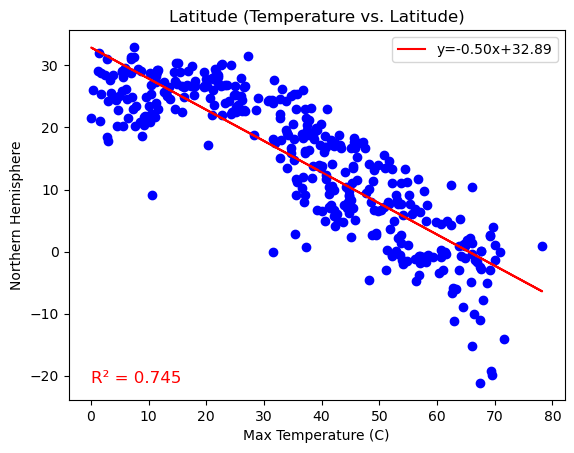

In [61]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Temperature vs. Latitude", "Latitude", "Max Temperature (C)", "Northern Hemisphere")

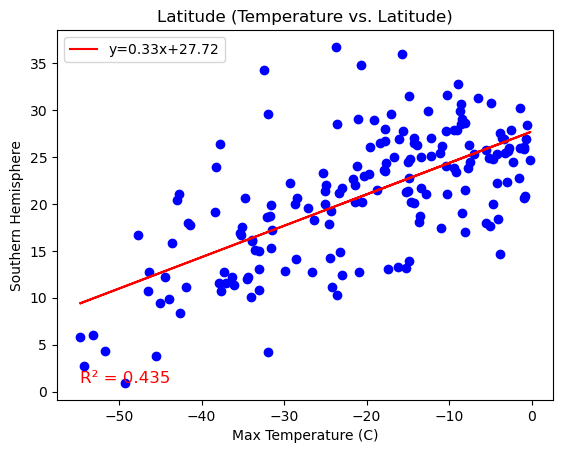

In [63]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Temperature vs. Latitude", "Latitude", "Max Temperature (C)", "Southern Hemisphere")

**Discussion about the linear relationship:** The linear relationship between latitude and temperature is evident in both the Northern and Southern Hemisphere plots, but with notable differences. In the Southern Hemisphere, the relationship is positive, meaning that as latitude increases (moving towards the equator), temperatures rise, with a moderate R² value of 0.435, indicating that latitude explains about 43.5% of the variation in temperature. In contrast, the Northern Hemisphere shows a strong negative relationship between latitude and temperature, with a steeper slope and a higher R² value of 0.745. This means that as latitude increases (moving away from the equator), temperatures significantly decrease, and latitude explains 74.5% of the temperature variation. Overall, latitude is a stronger predictor of temperature in the Northern Hemisphere than in the Southern Hemisphere, where other factors may play a larger role in determining temperature.

### Humidity vs. Latitude Linear Regression Plot

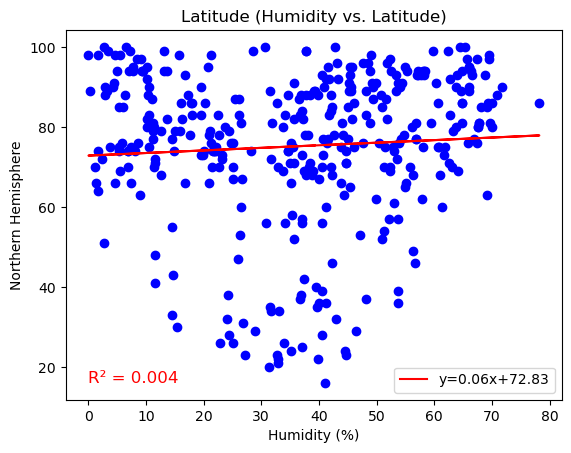

In [67]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Northern Hemisphere")

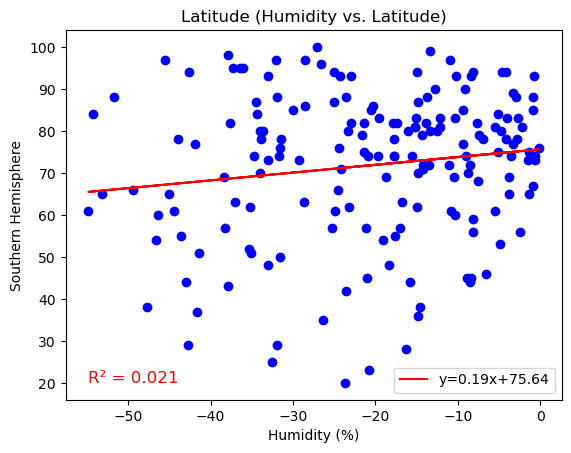

In [69]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Humidity vs. Latitude", "Latitude", "Humidity (%)", "Southern Hemisphere")

**Discussion about the linear relationship:** In both the Northern and Southern Hemisphere plots, the linear relationship between latitude and humidity is very weak. In the Southern Hemisphere, the regression line shows a slightly positive slope, indicating a minor increase in humidity as latitude increases, but the R² value of 0.021 suggests that latitude explains only about 2.1% of the variation in humidity. This indicates a very weak correlation, meaning that other factors besides latitude have a greater influence on humidity levels in the Southern Hemisphere. Similarly, in the Northern Hemisphere, the R² value is even lower at 0.004, showing virtually no correlation between latitude and humidity. The flat slope of the regression line further emphasizes that latitude has little to no impact on humidity in this region. Overall, in both hemispheres, the relationship between latitude and humidity is insignificant, suggesting that local climate conditions and other environmental factors play a more dominant role in determining humidity.

### Cloudiness vs. Latitude Linear Regression Plot

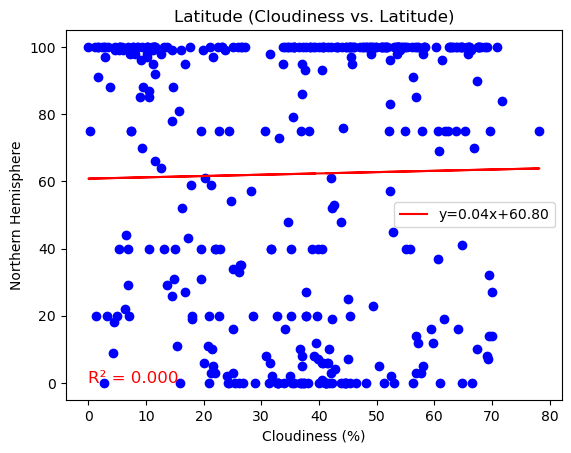

In [73]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Northern Hemisphere")

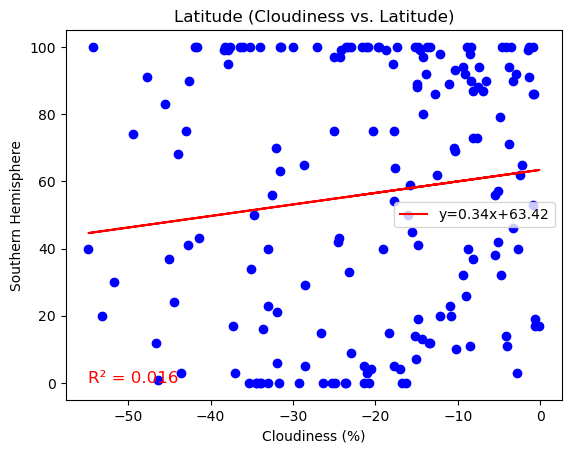

In [75]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Southern Hemisphere")

**Discussion about the linear relationship:** The linear relationship between latitude and cloudiness in both the Northern and Southern Hemisphere plots shows a very weak correlation. In the Northern Hemisphere, the R² value is 0.000, indicating no correlation between latitude and cloudiness. The regression line is essentially flat, suggesting that latitude does not explain any of the variation in cloudiness, and cloud cover is likely influenced by other factors such as local weather patterns and geography. Similarly, in the Southern Hemisphere, the R² value is 0.016, which is also very low, indicating that latitude explains only 1.6% of the variation in cloudiness. Although there is a slight positive slope in the regression line, it is not meaningful given the low R² value. Overall, in both hemispheres, latitude does not appear to significantly impact cloudiness, and other variables are likely responsible for variations in cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

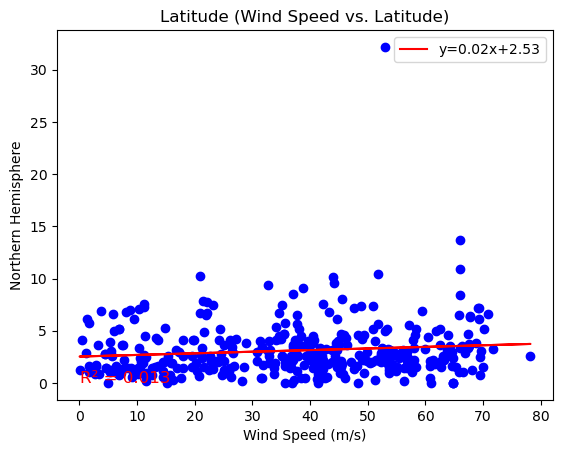

In [79]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", "Northern Hemisphere")

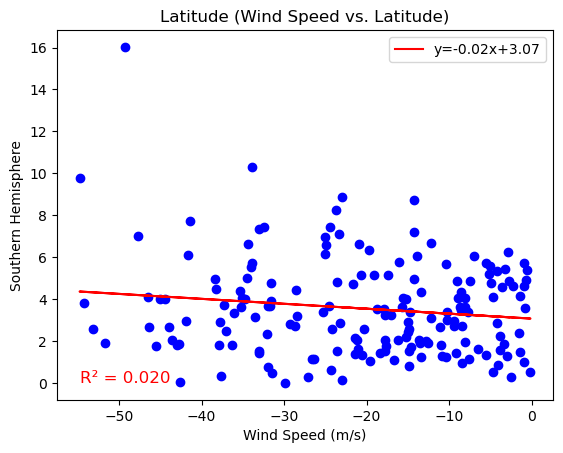

In [81]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)", "Southern Hemisphere")

**Discussion about the linear relationship:** In both the Northern and Southern Hemisphere plots for wind speed vs. latitude, there is an extremely weak linear relationship. In the Northern Hemisphere, the slope is slightly positive, but the R² value is 0.013, indicating that latitude explains only 1.3% of the variation in wind speed. This means there is almost no correlation between latitude and wind speed, suggesting that other environmental factors, such as local weather systems, play a much larger role. Similarly, in the Southern Hemisphere, the relationship is slightly negative, but the R² value is 0.020, again indicating an insignificant correlation between latitude and wind speed. Overall, in both hemispheres, the effect of latitude on wind speed is minimal, and the data shows that latitude is not a meaningful predictor of wind speed.